# **Build Recurrent Neural Network (RNN)**

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
# Import the Tokenizer class from the text module in TensorFlow Keras preprocessing
# This class is used to vectorize a text corpus, by turning each text into either a sequence of integers
# (each integer being the index of a token in a dictionary) or into a vector where the coefficient(s)
# for each token could be binary, based on word count, based on tf-idf...
from tensorflow.keras.preprocessing.text import Tokenizer
# Import the pad_sequences function from the sequence module in TensorFlow Keras preprocessing
# This function is used to ensure that all sequences in a list have the same length,
# by padding shorter sequences with a specified value (by default 0) or truncating longer sequences
# to a specified length.
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **Sample Data for Training**

In [4]:

# Sample data
sentences = [
    "Machine learning algorithms are powerful tools."
    "I enjoy exploring new algorithms."
    "Learning about AI is captivating."
    "Deep learning models can be complex."
    "I love understanding how neural networks work."
    "The field of data science is evolving rapidly."
    "I find artificial intelligence intriguing."
    "Studying computer vision is exciting."
    "Natural language processing is a fascinating domain."
    "I enjoy coding in Python for data science projects."
    "Building models is a creative process."
    "I love experimenting with different machine learning techniques."
    "The potential of AI to transform industries is amazing."
    "I enjoy staying updated with the latest tech trends."
    "Learning about reinforcement learning is interesting."
    "I find predictive modeling to be very useful."
    "I love solving problems with data analysis."
    "Data preprocessing is a crucial step in machine learning."
    "I enjoy reading research papers on deep learning."
    "I find optimization techniques fascinating."
    "Understanding algorithms helps in developing better solutions."
    "I love the challenge of debugging code."
    "Machine learning applications are diverse and impactful."
    "I enjoy collaborating with others on tech projects."
    "Learning new programming languages is fun."
    "I love working with large datasets."
    "I find feature engineering to be an art."
    "Model evaluation is an essential part of machine learning."
    "I enjoy attending tech conferences."
    "Learning about big data technologies is exciting."
    "I love experimenting with neural network architectures."
    "I find the theory behind machine learning algorithms interesting."
    "I enjoy visualizing data insights."
    "Machine learning models can make accurate predictions."
    "I love the creativity involved in data storytelling."
    "I find unsupervised learning techniques intriguing."
    "I enjoy automating tasks with AI."
    "Learning about AI ethics is important."
    "I love the problem-solving aspect of machine learning."
    "I find cloud computing technologies fascinating."
    "I enjoy using machine learning for real-world applications."
    "I love experimenting with different data preprocessing techniques."
    "I find transfer learning to be a powerful approach."
    "I enjoy working on machine learning projects."
    "Learning about data privacy is crucial."
    "I love the innovation happening in the AI field."
    "I find data visualization tools useful."
    "I enjoy testing and validating machine learning models."
    "I love discovering new machine learning applications."
    "I find ensemble methods to be effective."
    "I enjoy learning from data."
    "Machine learning can provide valuable insights."
    "I love the interdisciplinary nature of AI."
    "I find recommendation systems interesting."
    "I enjoy participating in hackathons."
    "Learning about neural networks is fascinating."
    "I love the potential of AI to solve complex problems."
    "I find sentiment analysis intriguing."
    "I enjoy implementing machine learning algorithms."
    "I love the excitement of discovering patterns in data."
    "I find time series analysis challenging."
    "I enjoy exploring different types of data."
    "Machine learning is transforming various industries."
    "I love working on predictive analytics."
    "I find anomaly detection to be useful."
    "I enjoy studying the mathematics behind machine learning."
    "I love the hands-on experience of building models."
    "I find clustering techniques interesting."
    "I enjoy exploring open-source machine learning libraries."
    "Machine learning can automate complex tasks."
    "I love the flexibility of machine learning models."
    "I find computer vision applications fascinating."
    "I enjoy solving real-world problems with AI."
    "I love the continuous learning aspect of AI."
    "I find reinforcement learning to be challenging."
    "I enjoy experimenting with hyperparameter tuning."
    "Machine learning can improve decision-making processes."
    "I love the creativity involved in feature selection."
    "I find generative models to be fascinating."
    "I enjoy reading about the latest AI advancements."
    "Machine learning can enhance user experiences."
    "I love the diversity of machine learning applications."
    "I find natural language generation intriguing."
    "I enjoy working with text data."
    "Machine learning can optimize business processes."
    "I love the innovation in AI research."
    "I find the concept of machine learning interpretability interesting."
    "I enjoy creating machine learning workflows."
    "Machine learning can uncover hidden patterns."
    "I love the impact of AI on society."
    "I find deep reinforcement learning fascinating."
    "I enjoy developing custom machine learning solutions."
    "Machine learning can improve customer experiences."
    "I love the potential of AI in healthcare."
    "I find the scalability of machine learning models intriguing."
    "I enjoy applying machine learning to finance."
    "Machine learning can enhance security measures."
    "I love the possibilities of AI in creative industries."
    "I find the ethical implications of AI important."
    "I enjoy sharing knowledge about machine learning."
    "This Free Advance AI Course that is helping alot of students to learn the concepts of AI and provides the detailed guideline on how to learn AI. This course enables the students to make their own projects. Updates them with the state of the art technologies and provide all the necessary knowlegde so that they should not be dependend on anyone to be able to learn anything."
]

# **Tokenization and Preprocessing of Data**


Here's a summarized explanation for a Colab notebook:

Text Preprocessing Overview

Tokenizer:

Converts text into sequences of integers, assigning a unique index to each word.
fit_on_texts: Updates vocabulary based on input text.

texts_to_sequences: Converts texts to integer sequences.
Sequences and Padding:

N-gram Sequences: Created from text sequences for language modeling.

Padding: Ensures all sequences are the same length using pad_sequences, with zeros added at the beginning if necessary.

Total Words:

Represents the number of unique words plus one for padding, useful for setting model output size.

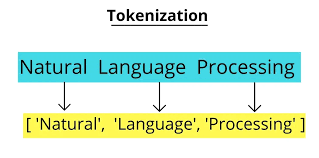

In [5]:
# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the provided sentences
tokenizer.fit_on_texts(sentences)

# Get the total number of unique words (plus one for padding)
total_words = len(tokenizer.word_index) + 1
print(total_words)
print(tokenizer.word_index)

# Initialize a list to hold input sequences
input_sequences = []

# Iterate over each sentence
for line in sentences:
    # Convert the sentence to a sequence of integers
    token_list = tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    # Create n-gram sequences
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)




# Determine the maximum sequence length
max_sequence_len = max([len(x) for x in input_sequences])

# Pad sequences to ensure they are all the same length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)


254
{'i': 1, 'learning': 2, 'machine': 3, 'the': 4, 'enjoy': 5, 'love': 6, 'find': 7, 'of': 8, 'ai': 9, 'is': 10, 'to': 11, 'data': 12, 'with': 13, 'in': 14, 'can': 15, 'be': 16, 'about': 17, 'models': 18, 'on': 19, 'fascinating': 20, 'algorithms': 21, 'intriguing': 22, 'techniques': 23, 'interesting': 24, 'applications': 25, 'a': 26, 'projects': 27, 'experimenting': 28, 'and': 29, 'working': 30, 'exploring': 31, 'new': 32, 'deep': 33, 'complex': 34, 'neural': 35, 'different': 36, 'potential': 37, 'industries': 38, 'tech': 39, 'reinforcement': 40, 'useful': 41, 'solving': 42, 'problems': 43, 'analysis': 44, 'technologies': 45, 'learn': 46, 'are': 47, 'powerful': 48, 'tools': 49, 'understanding': 50, 'how': 51, 'networks': 52, 'field': 53, 'science': 54, 'studying': 55, 'computer': 56, 'vision': 57, 'exciting': 58, 'natural': 59, 'language': 60, 'for': 61, 'building': 62, 'creative': 63, 'latest': 64, 'predictive': 65, 'preprocessing': 66, 'crucial': 67, 'reading': 68, 'research': 69, '

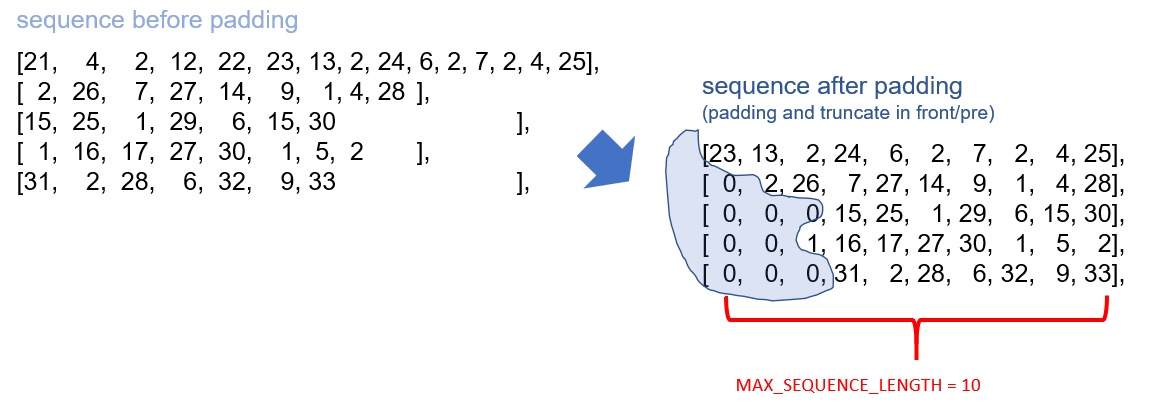

# **Data Preparation:**

Inputs (X): Extracted from the input sequences, excluding the last word of each sequence. These are the features for the model.

Labels (y): The last word of each sequence, representing the target output for the model.

One-Hot Encoding: The labels are converted to a one-hot encoded format to be used in training, with a size corresponding to the total number of unique words.

In [7]:
# Split data into inputs and labels

# Inputs: All elements of the sequences except the last one
X = input_sequences[:, :-1]
print("Input Data: ",X)

# Labels: The last element of each sequence (the word to predict)
y = input_sequences[:, -1]
print("Labels: ",y)

# Convert labels to one-hot encoded format
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
# print("one hot encoded Vector: ", y)

Input Data:  [[  0   0   0 ...   0   0   3]
 [  0   0   0 ...   0   3   2]
 [  0   0   0 ...   3   2  21]
 ...
 [  0   0   3 ...  11  16 252]
 [  0   3   2 ...  16 252  11]
 [  3   2  21 ... 252  11  46]]
Labels:  [  2  21  47  48  49   1   5  31  32  21   2  17   9  10  98  33   2  18
  15  16  34   1   6  50  51  35  52  99   4  53   8  12  54  10 100 101
   1   7 102 103  22  55  56  57  10  58  59  60 104  10  26  20 105   1
   5 106  14 107  61  12  54  27  62  18  10  26  63 108   1   6  28  13
  36   3   2  23   4  37   8   9  11 109  38  10 110   1   5 111 112  13
   4  64  39 113   2  17  40   2  10  24   1   7  65 114  11  16 115  41
   1   6  42  43  13  12  44  12  66  10  26  67 116  14   3   2   1   5
  68  69 117  19  33   2   1   7 118  23  20  50  21 119  14  70 120  71
   1   6   4 121   8 122 123   3   2  25  47 124  29 125   1   5 126  13
 127  19  39  27   2  32 128 129  10 130   1   6  30  13 131 132   1   7
  72 133  11  16  73  74 134 135  10  73 136 137   8   3

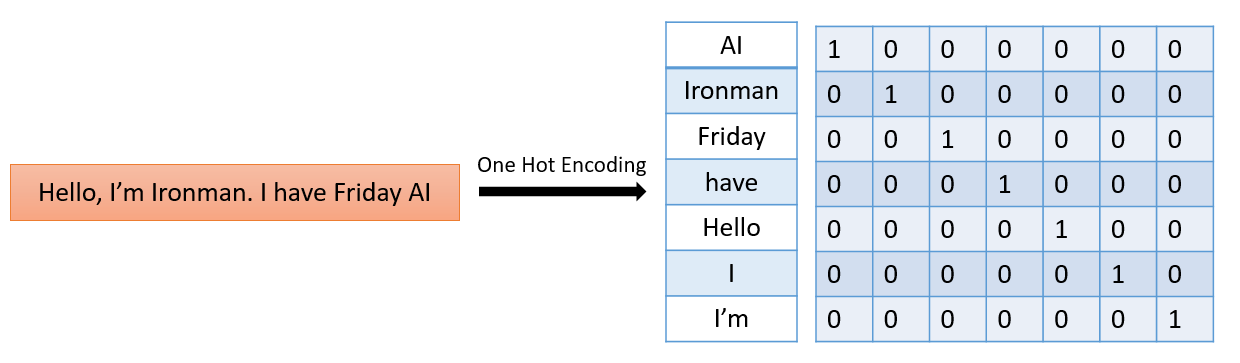

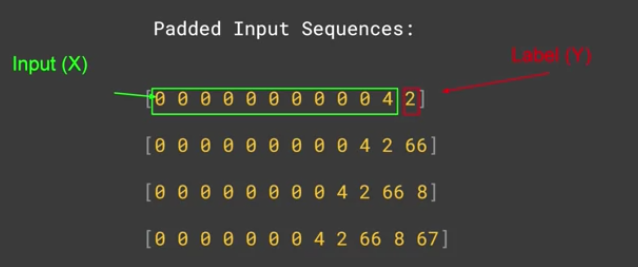

## **Defining the Model Architecture:**

**Sequential Model:** A linear stack of layers.

**Embedding Layer:** Converts word indices to dense vectors, helping the model understand word relationships.

**SimpleRNN Layer:** Processes the sequence data and captures temporal dependencies.

Dense Layer with Softmax: Outputs a probability distribution over the total words, predicting the next word in the sequence.

In [8]:
# Define the RNN model

# Sequential model allows stacking layers in a linear fashion
model = Sequential([
    # Embedding layer to convert word indices to dense vectors of fixed size
    # Input dimension: total number of words, Output dimension: size of embedding vectors
    # Input length: length of input sequences (excluding the last word)
    Embedding(total_words, 10, input_length=max_sequence_len-1),

    # SimpleRNN layer with 30 units, which processes the sequence data
    SimpleRNN(30),

    # Dense output layer with a softmax activation function
    # Output dimension: total number of words (for multi-class classification)
    Dense(total_words, activation='softmax')
])


c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.0050 - loss: 5.5097
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0324 - loss: 5.3051
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.0948 - loss: 4.9633
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.0906 - loss: 4.7968
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.0934 - loss: 4.6676
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.0798 - loss: 4.6465
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.0974 - loss: 4.6194
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.0979 - loss: 4.6365
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.0794 - loss: 4.6459
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.1010 - loss: 4.6739


# **Next Word Prediction:**

**Seed Text Conversion:** The input text (seed_text) is converted to a sequence of integers using the tokenizer.

**Padding:** The integer sequence is padded to ensure it matches the model's expected input length.

**Prediction:** The model predicts the probability of each word in the vocabulary as the next word.

**Selection and Update:** The word with the highest probability is selected, converted back to a word, and appended to the seed text.

**Iterative Prediction:** This process can be repeated for a specified number of words (next_words).

In [15]:
# Function to predict the next word(s) given a seed text
def predict_next_word(seed_text, next_words=1):
    for _ in range(next_words):
        # Convert the seed text to a sequence of integers
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the sequence to match the input length required by the model
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Predict the probabilities of the next word in the sequence
        predicted = model.predict(token_list, verbose=0)

        # Get the index of the word with the highest probability
        predicted_word_index = np.argmax(predicted, axis=-1)[0]

        # Retrieve the word corresponding to the predicted index
        predicted_word = tokenizer.index_word[predicted_word_index]

        # Append the predicted word to the seed text
        seed_text += " " + predicted_word

    # Return the updated seed text with the predicted word(s)
    return seed_text


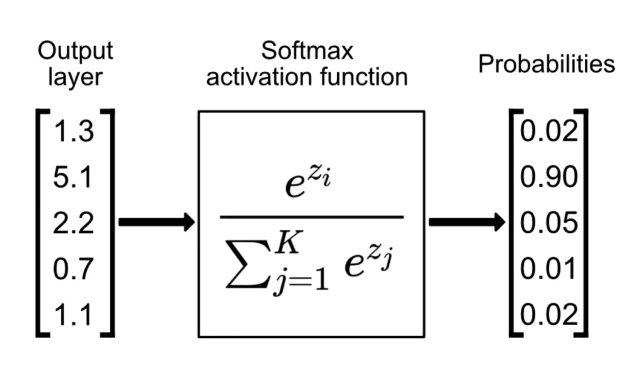

In [17]:
# Test the prediction function with a sample input
print(predict_next_word("I enjoy exploring new "))

I enjoy exploring new  i


# **Building a Long Short-Term Memory (LSTM)**

In [18]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **Sample Data**

In [19]:

# Sample data
sentences = [
    "Machine learning algorithms are powerful tools."
    "I enjoy exploring new algorithms."
    "Learning about AI is captivating."
    "Deep learning models can be complex."
    "I love understanding how neural networks work."
    "The field of data science is evolving rapidly."
    "I find artificial intelligence intriguing."
    "Studying computer vision is exciting."
    "Natural language processing is a fascinating domain."
    "I enjoy coding in Python for data science projects."
    "Building models is a creative process."
    "I love experimenting with different machine learning techniques."
    "The potential of AI to transform industries is amazing."
    "I enjoy staying updated with the latest tech trends."
    "Learning about reinforcement learning is interesting."
    "I find predictive modeling to be very useful."
    "I love solving problems with data analysis."
    "Data preprocessing is a crucial step in machine learning."
    "I enjoy reading research papers on deep learning."
    "I find optimization techniques fascinating."
    "Understanding algorithms helps in developing better solutions."
    "I love the challenge of debugging code."
    "Machine learning applications are diverse and impactful."
    "I enjoy collaborating with others on tech projects."
    "Learning new programming languages is fun."
    "I love working with large datasets."
    "I find feature engineering to be an art."
    "Model evaluation is an essential part of machine learning."
    "I enjoy attending tech conferences."
    "Learning about big data technologies is exciting."
    "I love experimenting with neural network architectures."
    "I find the theory behind machine learning algorithms interesting."
    "I enjoy visualizing data insights."
    "Machine learning models can make accurate predictions."
    "I love the creativity involved in data storytelling."
    "I find unsupervised learning techniques intriguing."
    "I enjoy automating tasks with AI."
    "Learning about AI ethics is important."
    "I love the problem-solving aspect of machine learning."
    "I find cloud computing technologies fascinating."
    "I enjoy using machine learning for real-world applications."
    "I love experimenting with different data preprocessing techniques."
    "I find transfer learning to be a powerful approach."
    "I enjoy working on machine learning projects."
    "Learning about data privacy is crucial."
    "I love the innovation happening in the AI field."
    "I find data visualization tools useful."
    "I enjoy testing and validating machine learning models."
    "I love discovering new machine learning applications."
    "I find ensemble methods to be effective."
    "I enjoy learning from data."
    "Machine learning can provide valuable insights."
    "I love the interdisciplinary nature of AI."
    "I find recommendation systems interesting."
    "I enjoy participating in hackathons."
    "Learning about neural networks is fascinating."
    "I love the potential of AI to solve complex problems."
    "I find sentiment analysis intriguing."
    "I enjoy implementing machine learning algorithms."
    "I love the excitement of discovering patterns in data."
    "I find time series analysis challenging."
    "I enjoy exploring different types of data."
    "Machine learning is transforming various industries."
    "I love working on predictive analytics."
    "I find anomaly detection to be useful."
    "I enjoy studying the mathematics behind machine learning."
    "I love the hands-on experience of building models."
    "I find clustering techniques interesting."
    "I enjoy exploring open-source machine learning libraries."
    "Machine learning can automate complex tasks."
    "I love the flexibility of machine learning models."
    "I find computer vision applications fascinating."
    "I enjoy solving real-world problems with AI."
    "I love the continuous learning aspect of AI."
    "I find reinforcement learning to be challenging."
    "I enjoy experimenting with hyperparameter tuning."
    "Machine learning can improve decision-making processes."
    "I love the creativity involved in feature selection."
    "I find generative models to be fascinating."
    "I enjoy reading about the latest AI advancements."
    "Machine learning can enhance user experiences."
    "I love the diversity of machine learning applications."
    "I find natural language generation intriguing."
    "I enjoy working with text data."
    "Machine learning can optimize business processes."
    "I love the innovation in AI research."
    "I find the concept of machine learning interpretability interesting."
    "I enjoy creating machine learning workflows."
    "Machine learning can uncover hidden patterns."
    "I love the impact of AI on society."
    "I find deep reinforcement learning fascinating."
    "I enjoy developing custom machine learning solutions."
    "Machine learning can improve customer experiences."
    "I love the potential of AI in healthcare."
    "I find the scalability of machine learning models intriguing."
    "I enjoy applying machine learning to finance."
    "Machine learning can enhance security measures."
    "I love the possibilities of AI in creative industries."
    "I find the ethical implications of AI important."
    "I enjoy sharing knowledge about machine learning."
]

# **Tokenization and Preprocessing of Data**


Here's a summarized explanation for a Colab notebook:

Text Preprocessing Overview
Tokenizer:

Converts text into sequences of integers, assigning a unique index to each word.
fit_on_texts: Updates vocabulary based on input text.
texts_to_sequences: Converts texts to integer sequences.
Sequences and Padding:

N-gram Sequences: Created from text sequences for language modeling.
Padding: Ensures all sequences are the same length using pad_sequences, with zeros added at the beginning if necessary.
Total Words:

Represents the number of unique words plus one for padding, useful for setting model output size.

In [20]:
# Tokenization and preprocessing

# Initialize the Tokenizer to convert text into sequences of integers
tokenizer = Tokenizer()

# Fit the tokenizer on the provided sentences to build the vocabulary
# Each unique word is assigned a unique integer index
tokenizer.fit_on_texts(sentences)

# Total number of unique words in the vocabulary plus one for padding
total_words = len(tokenizer.word_index) + 1

# Initialize a list to hold sequences of tokenized words
input_sequences = []

# Process each sentence
for line in sentences:
    # Convert the sentence to a sequence of integers based on the tokenizer
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Generate n-gram sequences from the integer sequence
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]  # Create a sequence including up to the i-th word
        input_sequences.append(n_gram_sequence)  # Add the sequence to the list

# Find the maximum length of sequences
max_sequence_len = max([len(x) for x in input_sequences])

# Pad sequences to ensure they are all the same length
# Padding is added at the beginning of the sequences (pre-padding)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


# **Data Preparation:**

Inputs (X): Extracted from the input sequences, excluding the last word of each sequence. These are the features for the model.

Labels (y): The last word of each sequence, representing the target output for the model.

One-Hot Encoding: The labels are converted to a one-hot encoded format to be used in training, with a size corresponding to the total number of unique words.

In [21]:
# Split data into inputs and labels

# Extract input sequences: all elements except the last one
X = input_sequences[:, :-1]

# Extract labels: the last element of each sequence
y = input_sequences[:, -1]

# Convert labels to one-hot encoded format
# This creates a binary matrix representation of the labels with one-hot encoding
# num_classes is the total number of unique words in the vocabulary
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


# **Defining the LSTM Model**

In [22]:
# Define the LSTM model

# Sequential model allows stacking layers in a linear fashion
model = Sequential([
    # Embedding layer: Converts word indices to dense vectors
    # Input dimension: total number of words, Output dimension: size of embedding vectors
    # Input length: length of input sequences (excluding the last word)
    Embedding(total_words, 10, input_length=max_sequence_len-1),

    # LSTM layer with 30 units
    # LSTM (Long Short-Term Memory) is a type of RNN that can capture long-term dependencies
    LSTM(100),

    # Dense output layer with a softmax activation function
    # Output dimension: total number of words (for multi-class classification)
    # Softmax activation converts the output to probabilities for each word
    Dense(total_words, activation='softmax')
])


c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Compiling the model**

In [23]:

# Compile the model

# Compile the model specifies the loss function, optimizer, and evaluation metrics
model.compile(
    # Loss function: Categorical cross-entropy, used for multi-class classification problems
    loss='categorical_crossentropy',

    # Optimizer: Adam, an efficient optimization algorithm that adjusts the learning rate during training
    optimizer='adam',

    # Metrics: Accuracy, to evaluate the model's performance during training and testing
    metrics=['accuracy']
)



# **Training the Model**

In [24]:
# Train the model

# Fit the model on the training data
# X: Input sequences
# y: One-hot encoded labels
# epochs: Number of times the model will go through the entire dataset
# verbose: Controls the verbosity of the output during training (1 for progress bar)
model.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.0693 - loss: 5.3673
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.1012 - loss: 4.6542
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.1158 - loss: 4.4944
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.1041 - loss: 4.4994
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.1092 - loss: 4.5482
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.1063 - loss: 4.5454
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.1021 - loss: 4.5063
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.1078 - loss: 4.4730
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.1196 - loss: 4.4820
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.1394 - loss: 4.3993
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.1857 - loss: 4.2308
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step

## **Prediction of Next Word**

In [33]:
# Function to predict the next word(s) given a seed text
def predict_next_word(seed_text, next_words=1):
    # Repeat the prediction process for the specified number of next words
    for _ in range(next_words):
        # Convert the seed text into a sequence of integers using the tokenizer
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the sequence to ensure it matches the input length expected by the model
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Predict the probabilities of the next word in the sequence
        predicted = model.predict(token_list, verbose=0)

        # Get the index of the word with the highest probability
        predicted_word_index = np.argmax(predicted, axis=-1)[0]

        # Retrieve the word corresponding to the predicted index
        predicted_word = tokenizer.index_word[predicted_word_index]

        # Append the predicted word to the seed text
        seed_text += " " + predicted_word

    # Return the updated seed text with the predicted word(s)
    return seed_text


In [36]:
# Test prediction
print(predict_next_word("Learning about"))

Learning about the
